# Spam Detection Project

In this project, I have prepared a spam detector system that classifies a text as a spam.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_table('smscollection/SMSCollection',
                    sep='\t',
                    header=None,
                    names=['label','messages'])
data.head()

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
def explore_data(df):
    print('Shape of data:',df.shape)
    print('No. of Null values:',df.isnull().sum().sum())
    print('Info. of data:',df.info())
    print('Description of data:',df.describe())
    
explore_data(data)    

Shape of data: (5572, 2)
No. of Null values: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   label     5572 non-null   object
 1   messages  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
Info. of data: None
Description of data:        label                messages
count   5572                    5572
unique     2                    5169
top      ham  Sorry, I'll call later
freq    4825                      30


# Exploring the data

Total no. of hams:  4825
Total no. of spams:  747


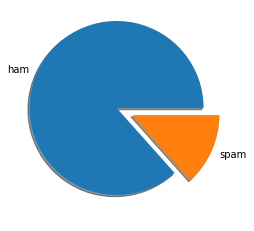

In [5]:
len_ham=len(data['label'][data.label=='ham'])
len_spam=len(data['label'][data.label=='spam'])

arr=np.array([len_ham, len_spam])
labels=['ham','spam']

print('Total no. of hams: ',len_ham)
print('Total no. of spams: ',len_spam)

plt.pie(arr, labels=labels, explode=[0.2,0.0],shadow=True)
plt.show()

# Text Processing

In [6]:
def text_preprocess(x):
    x=str(x).lower()
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will") 
    return x  

data["Preprocessed Text"] = data["messages"].apply(lambda x: text_preprocess(x))
data.head()

,label,messages,Preprocessed Text
0,ham,"Go until jurong point, crazy.. Available only ...","go until jurong point, crazy.. available only ..."
1,ham,Ok lar... Joking wif u oni...,ok lar... joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor... u c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro...","nah i do not think he goes to usf, he lives ar..."


In [7]:
print(data['messages'][0])
print("=================================================")
print(data['Preprocessed Text'][0])

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...


# Feature and Data Deveploment

In [8]:
data['label']=data.label.map({'ham':0,'spam':1})

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data['messages'],data['label'],random_state=1)

In [11]:
# for converting text to numbers
from sklearn.feature_extraction.text import CountVectorizer
count_vector=CountVectorizer()
training_data=count_vector.fit_transform(x_train)
testing_data=count_vector.transform(x_test)

# Model Development

In [12]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes=MultinomialNB()
naive_bayes.fit(training_data, y_train)

MultinomialNB()

In [13]:
predictions=naive_bayes.predict(testing_data)
predictions

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("Accuracy Score: ",format(accuracy_score(y_test, predictions)))
print("Precision Score: ",format(precision_score(y_test, predictions)))
print("Recall Score: ",format(recall_score(y_test, predictions)))
print("f1 Score: ",format(f1_score(y_test, predictions)))

Accuracy Score:  0.9885139985642498
Precision Score:  0.9720670391061452
Recall Score:  0.9405405405405406
f1 Score:  0.9560439560439562


In [16]:
doc=pd.Series('This is the 2nd time we have tried 2 cuntact u...')
test=count_vector.transform(doc)
naive_bayes.predict(test)

array([0], dtype=int64)